In [2]:
df_train = get_finance_train()
df_train

,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Division .,1
1,"The contract includes design , construction , delivery of equipment , installation and commissio...",1
2,Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...,2
3,"The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...",1
4,The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...,2
...,...,...
2032,Net sales increased to EUR193 .3 m from EUR179 .9 m and pretax profit rose by 34.2 % to EUR43 .1...,2
2033,"Operating profit totalled EUR 9.0 mn , down from EUR 9.7 mn in the first half of 2008 .",0
2034,Cash flow from operations in January-December 2008 was a negative EUR 18.1 mn compared to EUR 39...,0
2035,"In the first quarter of 2010 , the mark-to-market result was a pretax profit of EUR 133 million ...",2


In [3]:
df_test = get_finance_test()
df_test

,Sentence,Label
0,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...",2
1,Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...,2
2,Financing of the project will come mainly from China .,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...",1
4,Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...,2
...,...,...
222,About Dopplr Dopplr is a service for smart travellers .,1
223,Unit costs for flight operations fell by 6.4 percent .,2
224,Filmiteollisuus Fine Ab will be transferred to Talentum Oyj in the form of a subsidiary .,1
225,The casing comprises a first side casing member provided with the first side vat segment and a s...,1


In [4]:
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


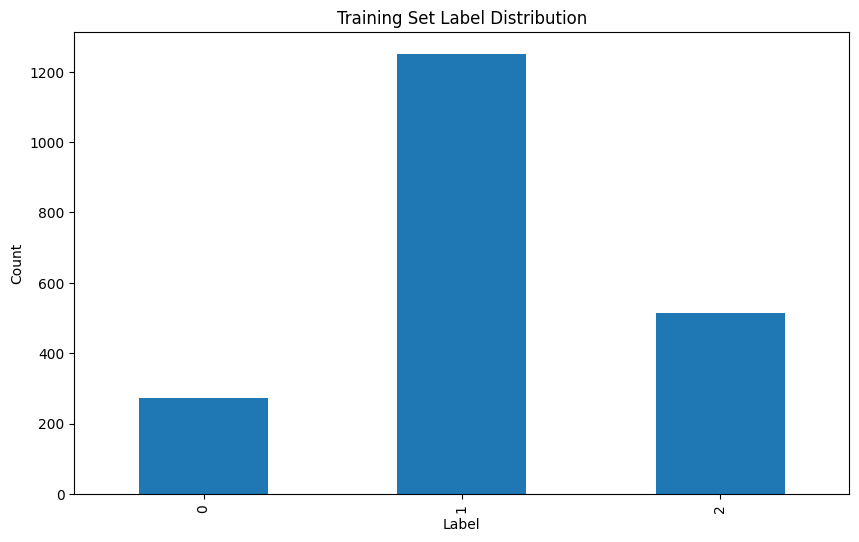

In [5]:
fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

### YOUR CODE HERE
df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)
### END CODE

plt.show()

#### **Tokenization**

In [6]:
### Stop words created so that they can be removed from the text
print(type(STOPWORD_SET))


<class 'set'>


Iterate through

In [16]:
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []
  ### YOUR CODE HERE
  for i in tokenized_sentence:
    for j in STOPWORD_SET:
      if i != j:
        filtered_sentence.append(i)
        break
  ### END CODE
  return filtered_sentence

**Try calling your code on the sentence from above, named `SAMPLE_SENTENCE`, to verify that you get the same output!**

In [17]:
remove_stopwords(SAMPLE_SENTENCE)

['I', 'need', 'to', 'remove', 'all', 'these', 'meaningless', 'stopwords', '.']

Now, we will apply the filtration to our entire training and testing datasets! To do so, call the `preprocess_data(DATA)` function passing in `df_train` for data. This function will return a list of all the filtered sentences and their respective labels: so, save this result two variables named `train_sentences` and `train_labels`. Thereafter, print the first few elements of `train_sentences` to assess your preprocessing!

In [18]:
### YOUR CODE HERE
train_sentences, train_labels = preprocess_data(df_train)
for sentence in train_sentences[:3]:
    print(sentence)

### END CODE

['Autotank', 'Group', 'is', 'part', 'of', 'Aspo', "'s", 'Systems', 'Division', '.']
['The', 'contract', 'includes', 'design', ',', 'construction', ',', 'delivery', 'of', 'equipment', ',', 'installation', 'and', 'commissioning', '.']
['Rapala', 'said', 'it', 'estimates', 'it', 'will', 'make', 'savings', 'of', '1-2', 'mln', 'eur', 'a', 'year', 'by', 'centralising', 'its', 'French', 'operations', 'at', 'one', 'site', '.']


Similarly preprocess your test data and save the result in a variable named `test_sentences`. Print the first few elements of `test_sentences` to assess the preprocessing.

In [19]:
test_sentences, test_labels = preprocess_data(df_test)
for sentence in test_sentences[:3]:
    print(sentence)

['In', 'the', 'third', 'quarter', 'of', '2010', ',', 'net', 'sales', 'increased', 'by', '5.2', '%', 'to', 'EUR', '205.5', 'mn', ',', 'and', 'operating', 'profit', 'by', '34.9', '%', 'to', 'EUR', '23.5', 'mn', '.']
['Foundries', 'division', 'reports', 'its', 'sales', 'increased', 'by', '9.7', '%', 'to', 'EUR', '63.1', 'mn', 'from', 'EUR', '57.5', 'mn', 'in', 'the', 'corresponding', 'period', 'in', '2006', ',', 'and', 'sales', 'of', 'the', 'Machine', 'Shop', 'division', 'increased', 'by', '16.4', '%', 'to', 'EUR', '41.2', 'mn', 'from', 'EUR', '35.4', 'mn', 'in', 'the', 'corresponding', 'period', 'in', '2006', '.']
['Financing', 'of', 'the', 'project', 'will', 'come', 'mainly', 'from', 'China', '.']


In [8]:
# List of sentences
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

#Create instance of CountVectorizer() object
vectorizer = CountVectorizer()

`CountVectorizer`'s `.fit()` method learns about the text (its length, vocabulary, etc.).

In [9]:
# Tokenizes the text and builds the vocabulary
vectorizer.fit(all_sentences)

CountVectorizer()

`CountVectorizer`'s `.transform()` method turns the sentences into their Bag-of-Words vector representations.

In [10]:
# Encode sentences as a vectors
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

# Print vectors
print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [11]:
### YOUR CODE HERE
print(bag_of_words_matrix.shape)
### END CODE

(2, 14)


In [32]:
def train_model(train_sentences, train_labels):
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]

  ### YOUR CODE HERE

  # vectorizer = initialize CountVectorizer
  vectorizer = CountVectorizer()

  # train_vect = get the vector representation of train_sentences using the .fit() and .transform() methods
  vectorizer.fit(train_sentences)
  train_vect = vectorizer.transform(train_sentences).toarray()

  # model = initialize a Logistic Regression model
  model = LogisticRegression()

  # Train with train_vect and train_labels using the .fit() method of LogisticRegression
  hist = model.fit(train_vect, train_labels)

  ### END CODE HERE

  return model, vectorizer, hist

In [34]:
### YOUR CODE HERE
model, train_vectorizer, hist = train_model(train_sentences, train_labels)
### END CODE

In [42]:
def predict(test_sentences, test_labels, vectorizer, model):
  test_sentences = [" ".join(t) for t in  test_sentences]


  test_vect = vectorizer.transform(test_sentences).toarray()

  preds = model.predict(test_vect)

  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [41]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)

print('Testing Accuracy: ')
print(test_accuracy)

Testing Accuracy: 
0.9074889867841409
